In [1]:
from mmdet.apis import inference_detector, init_detector

classes = ['0_Bulls Eye', '11_1', '12_2', '13_3', '14_4', '15_5', '16_6', '17_7',
            '18_8', '19_9', '20_A', '21_B', '22_C', '23_D', '24_E', '25_F', '26_G',
            '27_H', '28_S', '29_T', '30_U', '31_V', '32_W', '33_X', '34_Y', '35_Z',
            '36_Up', '37_Down', '38_Right', '39_Left', '40_Stop']

# Choose to use a config and initialize the detector
config = './configs/mdp/mdpv30.py'
# Setup a checkpoint file to load
checkpoint = '/Users/pengwenxuan/Desktop/mmdetection/work_dirs/mdpv30/epoch_300.pth'
# initialize the detector
model = init_detector(config, checkpoint, device='cpu')

Loads checkpoint by local backend from path: /Users/pengwenxuan/Desktop/mmdetection/work_dirs/mdpv30/epoch_300.pth


In [2]:
img = "/Users/pengwenxuan/Desktop/mmdetection/data/mdp-own/test/20240202_133302_jpg.rf.eee237494c00184f831dc2fc99751d6e.jpg"
result = inference_detector(model, img)

/Users/pengwenxuan/anaconda3/envs/openmmlab/lib/python3.8/site-packages/torch/functional.py:507: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /Users/runner/work/_temp/anaconda/conda-bld/pytorch_1704987088333/work/aten/src/ATen/native/TensorShape.cpp:3550.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [3]:
result.pred_instances

<InstanceData(

    META INFORMATION

    DATA FIELDS
    bboxes: tensor([[223.2159, 211.6291, 341.0565, 281.0368]])
    labels: tensor([0])
    scores: tensor([0.9234])
) at 0x103d31820>

### Visualization

In [4]:
import torch
import mmcv
from mmengine.visualization import Visualizer

# https://raw.githubusercontent.com/open-mmlab/mmengine/main/docs/en/_static/image/cat_and_dog.png
image = mmcv.imread(img)
# single bbox formatted as [xyxy]
if len(result.pred_instances.labels) == 0:
    print("Nothing see!")
else:
    visualizer = Visualizer(image=image)
    print(f"The predicted label is {classes[result.pred_instances.labels[0]]}")
    visualizer.draw_bboxes(result.pred_instances.bboxes[0])
    # draw multiple bboxes
    visualizer.show()

The predicted label is 0_Bulls Eye


In [62]:
result.pred_instances.labels.nelement() > 0

1

In [5]:
result.pred_instances.bboxes[0]

tensor([223.2159, 211.6291, 341.0565, 281.0368])

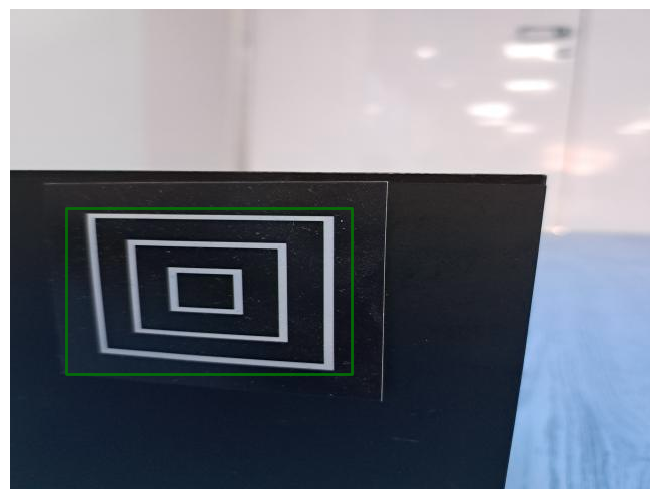

In [84]:
visualizer = Visualizer(image=image)
visualizer.draw_bboxes(result.pred_instances.bboxes[0])
visualizer.show()

### Check annotatoin

In [48]:
import json

In [128]:
with open("data/mdp_v4/test/_annotations.coco.json", 'r') as f:
    anno = json.load(f)

In [129]:
anno.keys()

dict_keys(['info', 'licenses', 'categories', 'images', 'annotations'])

In [130]:
anno['images'][120]

{'id': 120,
 'license': 1,
 'file_name': 'Right-2_mp4-5_jpg.rf.349b207fd018f582d1fc50ad4591b552.jpg',
 'height': 640,
 'width': 640,
 'date_captured': '2024-02-06T11:24:38+00:00'}

In [131]:
anno['annotations'][120]

{'id': 120,
 'image_id': 120,
 'category_id': 29,
 'bbox': [225, 247, 172, 98],
 'area': 16856,
 'segmentation': [],
 'iscrowd': 0}

### Check Anno

In [100]:
with open("/Users/pengwenxuan/Desktop/mmdetection/data/mdp-own/test/_annotations.coco.json", "r") as f:
    anno = json.load(f)

In [101]:
anno.keys()

dict_keys(['info', 'licenses', 'categories', 'images', 'annotations'])

In [132]:
anno['categories']

[{'id': 1, 'name': '0_Bulls Eye'},
 {'id': 2, 'name': '11_1'},
 {'id': 3, 'name': '12_2'},
 {'id': 4, 'name': '13_3'},
 {'id': 5, 'name': '14_4'},
 {'id': 6, 'name': '15_5'},
 {'id': 7, 'name': '16_6'},
 {'id': 8, 'name': '17_7'},
 {'id': 9, 'name': '18_8'},
 {'id': 10, 'name': '19_9'},
 {'id': 11, 'name': '20_A'},
 {'id': 12, 'name': '21_B'},
 {'id': 13, 'name': '22_C'},
 {'id': 14, 'name': '23_D'},
 {'id': 15, 'name': '24_E'},
 {'id': 16, 'name': '25_F'},
 {'id': 17, 'name': '26_G'},
 {'id': 18, 'name': '27_H'},
 {'id': 19, 'name': '28_S'},
 {'id': 20, 'name': '29_T'},
 {'id': 21, 'name': '30_U'},
 {'id': 22, 'name': '31_V'},
 {'id': 23, 'name': '32_W'},
 {'id': 24, 'name': '33_X'},
 {'id': 25, 'name': '34_Y'},
 {'id': 26, 'name': '35_Z'},
 {'id': 27, 'name': '36_Up'},
 {'id': 28, 'name': '37_Down'},
 {'id': 29, 'name': '38_Right'},
 {'id': 30, 'name': '39_Left'},
 {'id': 31, 'name': '40_Stop'}]

In [103]:
anno["images"][100]

{'id': 100,
 'license': 1,
 'file_name': '20240202_115256_jpg.rf.95734084cb0bd82d43fcdf68d3e04ae5.jpg',
 'height': 480,
 'width': 640,
 'date_captured': '2024-02-06T08:36:23+00:00'}

In [104]:
anno["annotations"][100]

{'id': 100,
 'image_id': 100,
 'category_id': 21,
 'bbox': [451, 208, 29.5, 24],
 'area': 708,
 'segmentation': [],
 'iscrowd': 0}

In [133]:
l = []
for anno in anno["annotations"]:
    l.append(anno["category_id"])
set(l)

{1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31}